<a href="https://colab.research.google.com/github/KirpaDmitriy/RetrievalAlgs/blob/main/retrieval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><i>Изучение алгоритмов поиска</i></h1>
<h4>Кирпа Дмитрий</h4>

Собираю данные в удобный формат (список смежности):

In [ ]:
table = '''Вильнюс Брест 531
Витебск Брест 638
Витебск Вильнюс 360
Воронеж Витебск 869
Воронеж Волгоград 581
Волгоград Витебск 1455
Витебск Ниж.Новгород 911
Вильнюс Даугавпилс 211
Калининград Брест 699
Калининград Вильнюс 333
Каунас Вильнюс 102
Киев Вильнюс 734
Киев Житомир 131
Житомир Донецк 863
Житомир Волгоград 1493
Кишинев Киев 467
Кишинев Донецк 812
С.Петербург Витебск 602
С.Петербург Калининград 739
С.Петербург Рига 641
Москва Казань 815
Москва Ниж.Новгород 411
Москва Минск 690
Москва Донецк 1084
Москва С.Петербург 664
Мурманск С.Петербург 1412
Мурманск Минск 2238
Орел Витебск 522
Орел Донецк 709
Орел Москва 368
Одесса Киев 487
Рига Каунас 267
Таллинн Рига 308
Харьков Киев 471
Харьков Симферополь 639
Ярославль Воронеж 739
Ярославль Минск 940
Уфа Казань 525
Уфа Самара 461'''

table = list(map(lambda el: el[0:2] + [int(el[2])], map(lambda el: el.split(), table.split('\n'))))
table

[['Вильнюс', 'Брест', 531],
 ['Витебск', 'Брест', 638],
 ['Витебск', 'Вильнюс', 360],
 ['Воронеж', 'Витебск', 869],
 ['Воронеж', 'Волгоград', 581],
 ['Волгоград', 'Витебск', 1455],
 ['Витебск', 'Ниж.Новгород', 911],
 ['Вильнюс', 'Даугавпилс', 211],
 ['Калининград', 'Брест', 699],
 ['Калининград', 'Вильнюс', 333],
 ['Каунас', 'Вильнюс', 102],
 ['Киев', 'Вильнюс', 734],
 ['Киев', 'Житомир', 131],
 ['Житомир', 'Донецк', 863],
 ['Житомир', 'Волгоград', 1493],
 ['Кишинев', 'Киев', 467],
 ['Кишинев', 'Донецк', 812],
 ['С.Петербург', 'Витебск', 602],
 ['С.Петербург', 'Калининград', 739],
 ['С.Петербург', 'Рига', 641],
 ['Москва', 'Казань', 815],
 ['Москва', 'Ниж.Новгород', 411],
 ['Москва', 'Минск', 690],
 ['Москва', 'Донецк', 1084],
 ['Москва', 'С.Петербург', 664],
 ['Мурманск', 'С.Петербург', 1412],
 ['Мурманск', 'Минск', 2238],
 ['Орел', 'Витебск', 522],
 ['Орел', 'Донецк', 709],
 ['Орел', 'Москва', 368],
 ['Одесса', 'Киев', 487],
 ['Рига', 'Каунас', 267],
 ['Таллинн', 'Рига', 308],
 ['Хар

In [ ]:
from collections import defaultdict

INFINITY = 10 ** 10

cities = defaultdict(lambda: defaultdict(lambda: INFINITY))
for line in table:
  city1, city2, distance = line
  cities[city1][city2] = distance
  cities[city2][city1] = distance
cities

defaultdict(<function __main__.<lambda>()>,
            {'Вильнюс': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'Брест': 531,
                          'Витебск': 360,
                          'Даугавпилс': 211,
                          'Калининград': 333,
                          'Каунас': 102,
                          'Киев': 734}),
             'Брест': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'Вильнюс': 531, 'Витебск': 638, 'Калининград': 699}),
             'Витебск': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'Брест': 638,
                          'Вильнюс': 360,
                          'Воронеж': 869,
                          'Волгоград': 1455,
                          'Ниж.Новгород': 911,
                          'С.Петербург': 602,
                          'Орел': 522}),
             'Воронеж': defaultdict(<function __main__.<lambda

Начальная и конечная точка для моего варианта:

In [ ]:
START = 'Брест'
FINISH = 'Казань'

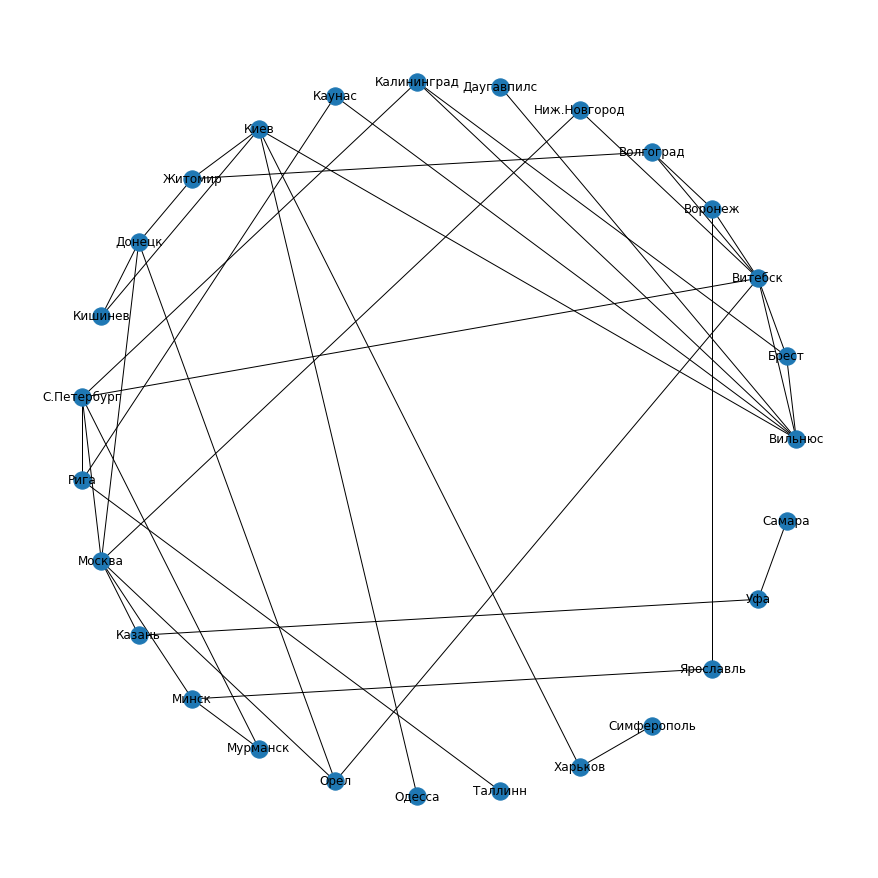

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
G=nx.Graph(cities)

plt.figure(3, figsize=(12,12)) 
nx.draw(G, with_labels=True, pos=nx.circular_layout(G))
plt.show()

In [ ]:
def visualize(graph, size=(6, 6)):
  G=nx.Graph(graph)
  plt.figure(3, figsize=size) 
  nx.draw(G, with_labels=True)
  plt.show()

<h4>Этап 1: неинформированный поиск</h4>

1) Поиск в ширину:

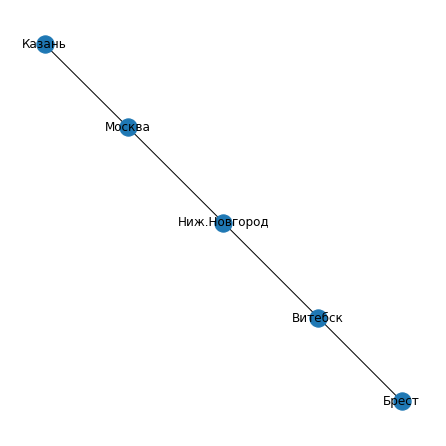

In [ ]:
from queue import Queue

class CitiesAreNotConnected(Exception):
  pass

def recollect_bfs_route(finish, parents):
  current_added_node = parents[finish]
  final_route = {finish: {current_added_node: 1}}
  while parents[current_added_node]:
    final_route[current_added_node] = {parents[current_added_node]: 1}
    current_added_node = parents[current_added_node]
  return final_route

def bfs_route(matrix, start, finish):
  assert start in matrix, 'Данных о начальном городе нет'
  assert finish in matrix, 'Данных о конечном городе нет'
  assert start != finish, 'Начальный и конечный города совпадают'
  all_cities = list(matrix.keys())
  is_visited = dict(zip(all_cities, [False] * len(all_cities)))
  previous_level = dict(zip(all_cities, [None] * len(all_cities)))
  to_visit_queue = Queue()
  to_visit_queue.put(start)
  is_visited[start] = True
  while not to_visit_queue.empty():
    current_city = to_visit_queue.get()
    for next_city in matrix[current_city]:
      if not is_visited[next_city]:
        is_visited[next_city] = True
        previous_level[next_city] = current_city
        if next_city == finish:
          return recollect_bfs_route(finish, previous_level)
        to_visit_queue.put(next_city)
  raise CitiesAreNotConnected('Маршрута между городами не обнаружено')

bfs_variant = bfs_route(cities, START, FINISH)
visualize(bfs_variant)

2) Поиск в глубину:

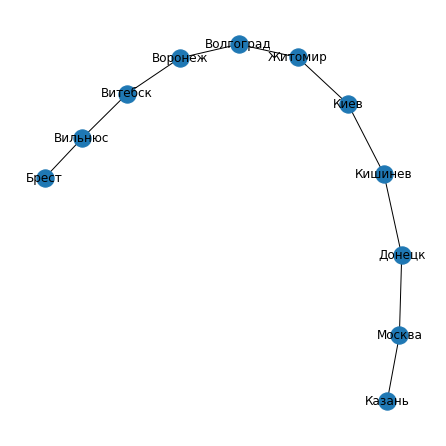

In [ ]:
all_cities = list(cities.keys())
visited_by_dfs = dict(zip(all_cities, [False] * len(all_cities)))
dfs_variant = {}
dfs_child_parent = {}

def dfs_route(matrix, current_node, finish):
  if current_node == finish:
    return
  visited_by_dfs[current_node] = True
  for next_city in matrix[current_node]:
    if not visited_by_dfs[next_city]:
      dfs_child_parent[next_city] = current_node
      dfs_route(matrix, next_city, finish)

dfs_route(cities, START, FINISH)
next_parent = dfs_child_parent[FINISH]
dfs_variant[FINISH] = {next_parent: 1}
while next_parent in dfs_child_parent:
  dfs_variant[next_parent] = {dfs_child_parent[next_parent]: 1}
  next_parent = dfs_child_parent[next_parent]
visualize(dfs_variant)

3) Поиск в глубину с ограничением глубины:

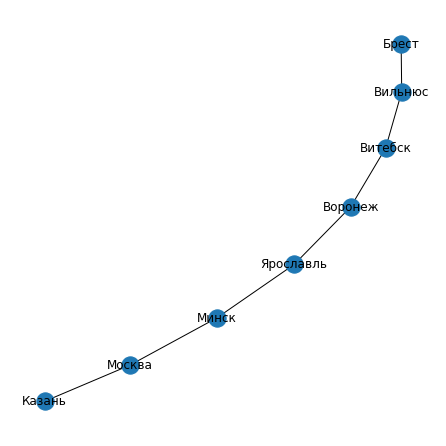

In [ ]:
visited_by_dfs_with_depth_limit = dict(zip(all_cities, [False] * len(all_cities)))
dfs_with_depth_limit_variant = {}
dfs_with_depth_limit_child_parent = {}
DEPTH_LIMIT = 8

def dfs_with_depth_limit_route(matrix, current_node, finish, depth=0):
  if current_node == finish:
    return
  if depth > DEPTH_LIMIT:
    return
  visited_by_dfs_with_depth_limit[current_node] = True
  for next_city in matrix[current_node]:
    if not visited_by_dfs_with_depth_limit[next_city]:
      dfs_with_depth_limit_child_parent[next_city] = current_node
      dfs_with_depth_limit_route(matrix, next_city, finish, depth + 1)

dfs_with_depth_limit_route(cities, START, FINISH)
next_parent = dfs_with_depth_limit_child_parent[FINISH]
dfs_with_depth_limit_variant[FINISH] = {next_parent: 1}
while next_parent in dfs_with_depth_limit_child_parent:
  dfs_with_depth_limit_variant[next_parent] = {dfs_with_depth_limit_child_parent[next_parent]: 1}
  next_parent = dfs_with_depth_limit_child_parent[next_parent]
visualize(dfs_with_depth_limit_variant)

4) Поиск в глубину с итеративным увеличением глубины:

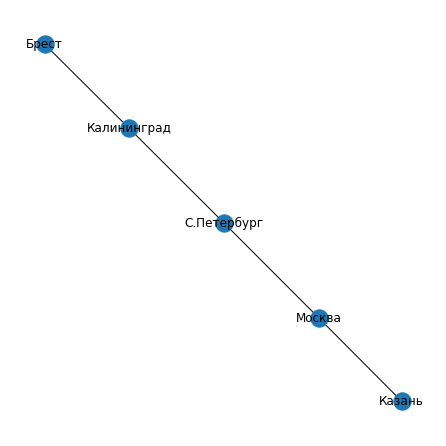

In [ ]:
def dfs_with_iterative_deepening(global_matrix, global_start, global_finish):

  def interactive_dfs_route(matrix, current_node, finish, depth=0):
    if current_node == finish:
      return
    if depth > DEPTH_LIMIT:
      visited_by_interactive_dfs[current_node] = False
      return
    visited_by_interactive_dfs[current_node] = True
    for next_city in matrix[current_node]:
      if not visited_by_interactive_dfs[next_city]:
        interactive_dfs_child_parent[next_city] = current_node
        interactive_dfs_route(matrix, next_city, finish, depth + 1)
    visited_by_interactive_dfs[current_node] = False
    
  for DEPTH_LIMIT in range(1, 7):
    visited_by_interactive_dfs = dict(zip(all_cities, [False] * len(all_cities)))
    interactive_dfs_variant = {}
    interactive_dfs_child_parent = {}
    interactive_dfs_route(global_matrix, global_start, global_finish)
    if global_finish not in interactive_dfs_child_parent:
      continue
    next_parent = interactive_dfs_child_parent[global_finish]
    interactive_dfs_variant[global_finish] = {next_parent: 1}
    while next_parent in interactive_dfs_child_parent:
      interactive_dfs_variant[next_parent] = {interactive_dfs_child_parent[next_parent]: 1}
      next_parent = interactive_dfs_child_parent[next_parent]
    if {global_start: 1} in interactive_dfs_variant.values() and global_finish in interactive_dfs_variant:
     return interactive_dfs_variant


interactive_dfs_variants = dfs_with_iterative_deepening(cities, START, FINISH)
visualize(interactive_dfs_variants)

5) Двусторонний поиск:

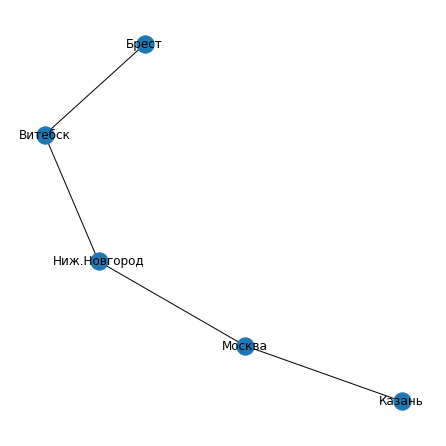

In [ ]:
def recollect_double_bfs_route(parents_from_start, parents_from_end, intersection):
  current_added_node = parents_from_start[intersection]
  final_route_from = {intersection: {current_added_node: 1}}
  while parents_from_start[current_added_node]:
    final_route_from[current_added_node] = {parents_from_start[current_added_node]: 1}
    current_added_node = parents_from_start[current_added_node]
  
  current_added_node = parents_from_end[intersection]
  final_route_to = {intersection: {current_added_node: 1}}
  while parents_from_end[current_added_node]:
    final_route_to[current_added_node] = {parents_from_end[current_added_node]: 1}
    current_added_node = parents_from_end[current_added_node]
  
  final_route = final_route_from
  for reversed_order_city in final_route_to:
    final_route[list(final_route_to[reversed_order_city].keys())[0]] = {reversed_order_city: 1}
  return final_route

def double_bfs_route(matrix, start, finish):
  assert start in matrix, 'Данных о начальном городе нет'
  assert finish in matrix, 'Данных о конечном городе нет'
  assert start != finish, 'Начальный и конечный города совпадают'
  all_cities = list(matrix.keys())
  is_visited = dict(zip(all_cities, [0] * len(all_cities)))
  previous_level_from_start = dict(zip(all_cities, [None] * len(all_cities)))
  previous_level_from_end = dict(zip(all_cities, [None] * len(all_cities)))
  to_visit_from_start_queue = Queue()
  to_visit_from_end_queue = Queue()
  to_visit_from_start_queue.put(start)
  to_visit_from_end_queue.put(finish)
  is_visited[start] = 1
  is_visited[finish] = 2
  while not to_visit_from_start_queue.empty() and not to_visit_from_end_queue.empty():
    current_city_from_start = to_visit_from_start_queue.get()
    current_city_from_end = to_visit_from_end_queue.get()
    for next_city in matrix[current_city_from_start]:
      if is_visited[next_city] != 1:
        previous_level_from_start[next_city] = current_city_from_start
        if is_visited[next_city] == 2:
          return recollect_double_bfs_route(previous_level_from_start, previous_level_from_end, next_city)
        is_visited[next_city] = 1
        to_visit_from_start_queue.put(next_city)
    for next_city in matrix[current_city_from_end]:
      if is_visited[next_city] != 2:
        previous_level_from_end[next_city] = current_city_from_end
        if is_visited[next_city] == 1:
          return recollect_double_bfs_route(previous_level_from_start, previous_level_from_end, next_city)
        is_visited[next_city] = 2
        to_visit_from_end_queue.put(next_city)
  raise CitiesAreNotConnected('Маршрута между городами не обнаружено')

double_bfs_variant = double_bfs_route(cities, START, FINISH)
visualize(double_bfs_variant)

In [ ]:
print(f'Длина пути, построенного BFS: {len(bfs_variant) + 1}')
print(f'Длина пути, построенного DFS: {len(dfs_variant) + 1}')
print(f'Длина пути, построенного DFS с ограничением глубины: {len(dfs_with_depth_limit_variant) + 1}')
print(f'Длина пути, построенного DFS с итеративным углулением: {len(interactive_dfs_variants) + 1}')
print(f'Длина пути, построенного BFS с двусторонним движением: {len(double_bfs_variant) + 1}')

Длина пути, построенного BFS: 5
Длина пути, построенного DFS: 11
Длина пути, построенного DFS с ограничением глубины: 8
Длина пути, построенного DFS с итеративным углулением: 5
Длина пути, построенного BFS с двусторонним движением: 5


<b>Вывод:</b> Как и было указано в методичке, поиск в глубину и поиск в глубину с её ограничением не являются оптимальными. Они дошли до какой-то первой попавшейся ведущей в нужную сторону ветви и вернули её. Поиск в ширину в обеих версиях вернул оптимальный варинат, так как граф невзвешен. Поиск же с итеративным углублением показал себя больше похожим на поиск в ширину.

<h4>Этап 2: информированный поиск</h4>

Реализовал поиск по критерию стоимости:

Вильнюс -> Каунас (102 км), Даугавпилс (211 км), Калининград (333 км), Витебск (360 км), Брест (531 км), Киев (734 км)
Брест -> Вильнюс (531 км), Витебск (638 км), Калининград (699 км)
Витебск -> Вильнюс (360 км), Орел (522 км), С.Петербург (602 км), Брест (638 км), Воронеж (869 км), Ниж.Новгород (911 км), Волгоград (1455 км)
Воронеж -> Волгоград (581 км), Ярославль (739 км), Витебск (869 км)
Волгоград -> Воронеж (581 км), Витебск (1455 км), Житомир (1493 км)
Ниж.Новгород -> Москва (411 км), Витебск (911 км)
Даугавпилс -> Вильнюс (211 км)
Калининград -> Вильнюс (333 км), Брест (699 км), С.Петербург (739 км)
Каунас -> Вильнюс (102 км), Рига (267 км)
Киев -> Житомир (131 км), Кишинев (467 км), Харьков (471 км), Одесса (487 км), Вильнюс (734 км)
Житомир -> Киев (131 км), Донецк (863 км), Волгоград (1493 км)
Донецк -> Орел (709 км), Кишинев (812 км), Житомир (863 км), Москва (1084 км)
Кишинев -> Киев (467 км), Донецк (812 км)
С.Петербург -> Витебск (602 км), Рига (641 км), Москва (664 км),

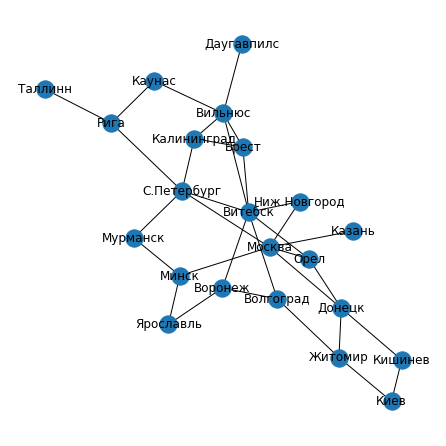

In [ ]:
def shortsighted(matrix, start, finish):
  sorted_by_dist_matrix = dict([(current, list(sorted(list(matrix[current].items()), key=lambda el: el[1])))
                          for current in matrix])
  for city, neighbours in sorted_by_dist_matrix.items():
    print(city, '->', ', '.join(list(map(lambda el: f'{el[0]} ({el[1]} км)', neighbours))))
  route = defaultdict(list)
  current = start
  prev_current = []
  while current != finish:
    if not sorted_by_dist_matrix[current]:
      current = prev_current.pop()
      route[current].pop()
      continue
    candidate = sorted_by_dist_matrix[current][0][0]
    route[current].append(candidate)
    prev_current.append(current)
    sorted_by_dist_matrix[current] = sorted_by_dist_matrix[current][1:]
    current = candidate
  return route

visualize(shortsighted(cities, START, FINISH))

Он часто заходит в тупики (к примеру, <i>Рига - Таллин - Рига</i>), так как ищет локальный, а не глобальный оптимум.

Для дальнейшей работы нужна эвристика расстояния между городами. За такую эвристику маршрута "по прямой" приму расстояние пути, вычисленного с помощью поиска в ширину.

In [ ]:
def recollect_bfs_route(finish, parents):
  current_added_node = parents[finish]
  final_route = {finish: {current_added_node: 1}}
  while parents[current_added_node]:
    final_route[current_added_node] = {parents[current_added_node]: 1}
    current_added_node = parents[current_added_node]
  return final_route

def bfs_distances(matrix, from_city):
  assert from_city in matrix, 'Данных о начальном городе нет'
  all_cities = list(matrix.keys())
  is_visited = dict(zip(all_cities, [False] * len(all_cities)))
  distances = dict(zip(all_cities, [INFINITY] * len(all_cities)))
  distances[from_city] = 0
  to_visit_queue = Queue()
  to_visit_queue.put(from_city)
  while not to_visit_queue.empty():
    current_city = to_visit_queue.get()
    is_visited[current_city] = True
    for next_city in matrix[current_city]:
      if not is_visited[next_city]:
        distances[next_city] = distances[current_city] + matrix[current_city][next_city]
        to_visit_queue.put(next_city)
  return distances

Kazan_heuristics = bfs_distances(cities, FINISH)
Kazan_heuristics

{'Вильнюс': 4299,
 'Брест': 3768,
 'Витебск': 3130,
 'Воронеж': 3999,
 'Волгоград': 4580,
 'Ниж.Новгород': 1226,
 'Даугавпилс': 4510,
 'Калининград': 2218,
 'Каунас': 4401,
 'Киев': 5033,
 'Житомир': 2762,
 'Донецк': 1899,
 'Кишинев': 2711,
 'С.Петербург': 1479,
 'Рига': 2120,
 'Москва': 815,
 'Казань': 0,
 'Минск': 1505,
 'Мурманск': 2891,
 'Орел': 2608,
 'Одесса': 5520,
 'Таллинн': 2428,
 'Харьков': 5504,
 'Симферополь': 6143,
 'Ярославль': 2445,
 'Уфа': 525,
 'Самара': 986}

In [ ]:
def route_len(points_list):
  d = 0
  prev_point = points_list[0]
  points_list = points_list[1:]
  for point in points_list:
    d += cities[prev_point][point]
    prev_point = point
  return d

Вильнюс -> Калининград (2218 км до Казани), Витебск (3130 км до Казани), Брест (3768 км до Казани), Каунас (4401 км до Казани), Даугавпилс (4510 км до Казани), Киев (5033 км до Казани)
Брест -> Калининград (2218 км до Казани), Витебск (3130 км до Казани), Вильнюс (4299 км до Казани)
Витебск -> Ниж.Новгород (1226 км до Казани), С.Петербург (1479 км до Казани), Орел (2608 км до Казани), Брест (3768 км до Казани), Воронеж (3999 км до Казани), Вильнюс (4299 км до Казани), Волгоград (4580 км до Казани)
Воронеж -> Ярославль (2445 км до Казани), Витебск (3130 км до Казани), Волгоград (4580 км до Казани)
Волгоград -> Житомир (2762 км до Казани), Витебск (3130 км до Казани), Воронеж (3999 км до Казани)
Ниж.Новгород -> Москва (815 км до Казани), Витебск (3130 км до Казани)
Даугавпилс -> Вильнюс (4299 км до Казани)
Калининград -> С.Петербург (1479 км до Казани), Брест (3768 км до Казани), Вильнюс (4299 км до Казани)
Каунас -> Рига (2120 км до Казани), Вильнюс (4299 км до Казани)
Киев -> Кишинев (

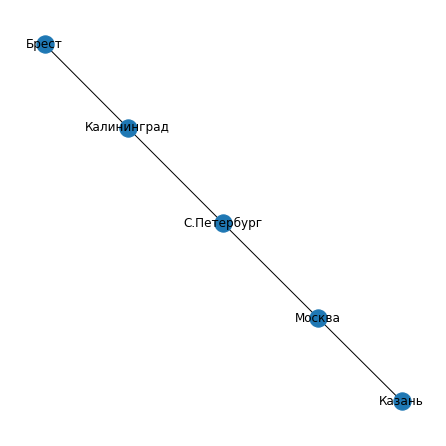

In [ ]:
def first_best_match(matrix, h, start, finish):
  sorted_by_dist_matrix = dict([(current, list(sorted(list(matrix[current].items()), key=lambda el: Kazan_heuristics[el[0]])))
                          for current in matrix])
  for city, neighbours in sorted_by_dist_matrix.items():
    print(city, '->', ', '.join(list(map(lambda el: f'{el[0]} ({Kazan_heuristics[el[0]]} км до Казани)', neighbours))))
  route = defaultdict(list)
  current = start
  prev_current = []
  while current != finish:
    if not sorted_by_dist_matrix[current]:
      current = prev_current.pop()
      route[current].pop()
      continue
    candidate = sorted_by_dist_matrix[current][0][0]
    route[current].append(candidate)
    prev_current.append(current)
    sorted_by_dist_matrix[current] = sorted_by_dist_matrix[current][1:]
    current = candidate
  return route

fbm_version = first_best_match(cities, Kazan_heuristics, START, FINISH)
visualize(fbm_version)

In [ ]:
route_len(list(fbm_version.keys()) + list(fbm_version.values())[-1])

2917

Поиск опять же производился на основании эвристики с попытками приблилижения к цели на каждом шаге за счёт движения в сторону локального уменьшения расстояния до цели.

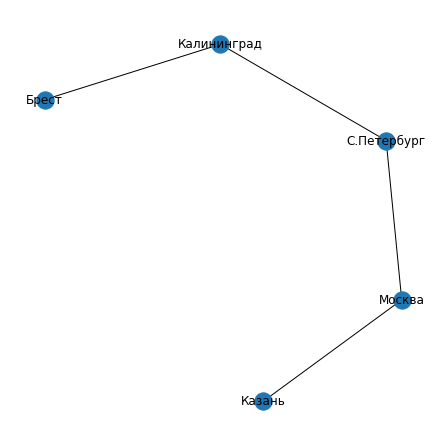

In [ ]:
def choose_from_backlog(backlog, cumulative_distance, h):
  optimum = None
  min_estimation = INFINITY
  for entry in backlog:
    if cumulative_distance[entry] + h[entry] < min_estimation:
      min_estimation = cumulative_distance[entry] + h[entry]
      optimum = entry
  return optimum

def recall_A_star_path(child_parent, matrix, finish):
  path = {}
  current = finish
  while current in child_parent:
    next = child_parent[current]
    path[current] = {next: matrix[current][next]}
    current = next
  return path

def A_star(matrix, h, start, finish):
  was_visited = defaultdict(lambda: False)
  was_visited[start] = True
  cumulative_distance = defaultdict(lambda: INFINITY)
  cumulative_distance[start] = 0
  backlog = [start]
  child_parent = {}
  while backlog:
    current = choose_from_backlog(backlog, cumulative_distance, h)
    if current == finish:
      return recall_A_star_path(child_parent, matrix, finish)
    backlog.remove(current)
    for neighbour in matrix[current]:
      if not was_visited[neighbour]:
        backlog.append(neighbour)
      was_visited[neighbour] = True
      
      if cumulative_distance[current] + matrix[current][neighbour] < cumulative_distance[neighbour]:
        child_parent[neighbour] = current
        cumulative_distance[neighbour] = cumulative_distance[current] + matrix[current][neighbour]

A_star_route = A_star(cities, Kazan_heuristics, START, FINISH)
visualize(A_star_route)

In [ ]:
route_len(list(A_star_route.keys()) + [list(list(A_star_route.values())[-1].keys())[0]])

2917

Теперь просмотрю вариант, предложенный одним из неинформированных алгоритмов:

In [ ]:
route_len(['Казань', 'Москва', 'Ниж.Новгород', 'Витебск', 'Брест'])

2775

Эвристческие алгоритмы выдали не самый оптимальный маршрут.

<b>Вывод:</b> информированный поиск неожиданно дал менее оптимальные маршруты, чем два из неинформированных вариантов. Вероятно, дело в неудачно выбранной эвристике: 

In [ ]:
cities['Брест']['Витебск'], Kazan_heuristics['Витебск']

(638, 3130)

In [ ]:
cities['Брест']['Калининград'], Kazan_heuristics['Калининград']

(699, 2218)

Изначально предпочтение было ошибочно отдано Калининграду, что испортило решение с самого начала и направило алгоритм в неправильную сторону.

Вильнюс -> Витебск (2200 км до Казани), Калининград (2218 км до Казани), Брест (3768 км до Казани), Каунас (4401 км до Казани), Даугавпилс (4510 км до Казани), Киев (5033 км до Казани)
Брест -> Витебск (2200 км до Казани), Калининград (2218 км до Казани), Вильнюс (4299 км до Казани)
Витебск -> Ниж.Новгород (1226 км до Казани), С.Петербург (1479 км до Казани), Орел (2608 км до Казани), Брест (3768 км до Казани), Воронеж (3999 км до Казани), Вильнюс (4299 км до Казани), Волгоград (4580 км до Казани)
Воронеж -> Витебск (2200 км до Казани), Ярославль (2445 км до Казани), Волгоград (4580 км до Казани)
Волгоград -> Витебск (2200 км до Казани), Житомир (2762 км до Казани), Воронеж (3999 км до Казани)
Ниж.Новгород -> Москва (815 км до Казани), Витебск (2200 км до Казани)
Даугавпилс -> Вильнюс (4299 км до Казани)
Калининград -> С.Петербург (1479 км до Казани), Брест (3768 км до Казани), Вильнюс (4299 км до Казани)
Каунас -> Рига (2120 км до Казани), Вильнюс (4299 км до Казани)
Киев -> Кишинев (

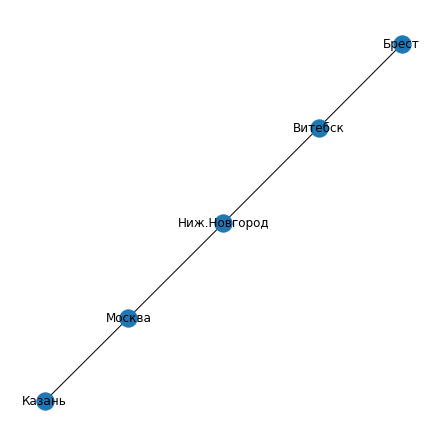

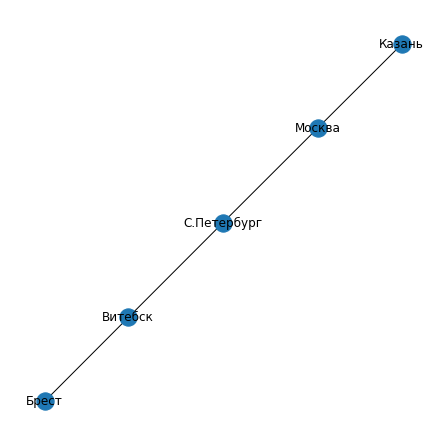

In [ ]:
Kazan_heuristics['Витебск'] = 2200
fbm_version = first_best_match(cities, Kazan_heuristics, START, FINISH)
visualize(fbm_version)
A_star_route = A_star(cities, Kazan_heuristics, START, FINISH)
visualize(A_star_route)

In [ ]:
route_len(['Казань', 'Москва', 'С.Петербург', 'Витебск', 'Брест'])

2719

Гипотеза об отрицательном влиянии эвристики подтвердилась. Первый алгоритм стал более оптимальным, чем был. Второй же алгоритм после корректировки параметров дал самый лучший результат.

В итоге, я увидел, что алгоритмы без доп информации эффективно решают поставленные перед ними задачи поиска оптимального решения с учётом имеющейся информации. Увеличение информации и использование более продвинутых алгоритмов не всегда приносит увеличение точности. Чтобы они работали правильно, нужно подобрать хорошую эвристику. В этом случае прирост информации действительно даст более точный ответ.

<h2>Источники:</h2>
<ul>
  <li><a href='https://books.ifmo.ru/file/pdf/658.pdf'>И.А Бессмертный "Искусственный интеллект. Учебное пособие"</a></li>
  <li><a href='https://habr.com/ru/post/444828/'>Простое объяснение алгоритмов поиска пути и A*
</a></li>
</ul>